In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
import keras
import numpy as np

In [ ]:
(xtrain , ytrain ), (xtest , ytest)= cifar10.load_data()

In [ ]:
print(xtrain.shape)
print(xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)
(50000, 1)
(10000, 1)


In [ ]:
xtrain = xtrain.astype('float32')
xtest = xtest.astype('float32')

xtrain = (xtrain - xtrain.min())/(xtrain.max() - xtrain.min())
xtest = (xtest - xtest.min())/(xtest.max() - xtest.min())
print(xtrain.min())
print(xtrain.max())

0.0
1.0


In [ ]:
ytrain = to_categorical(ytrain ,num_classes=10)
ytest = to_categorical(ytest , num_classes=10)
print(ytrain.shape)
print(ytest.shape)

(50000, 10)
(10000, 10)


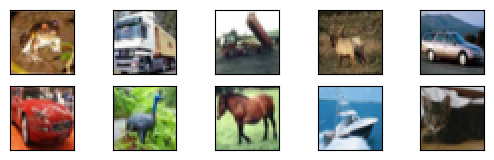

In [ ]:
for i in range(10):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(xtrain[i])
plt.show()

In [ ]:
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(32,32,3)))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Conv2D(64,(3,3),activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Conv2D(64,(3,3),activation='relu'))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(64,activation='relu'))
model.add(keras.layers.Dense(10,activation='softmax'))
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 4, 4, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │          65,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 122,570 (478.79 KB)

 Trainable params: 122,570 (478.79 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(keras.optimizers.Adam(learning_rate=0.001),loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
output_fit = model.fit(xtrain , ytrain , epochs=10 , batch_size=128)

Epoch 1/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 56s 140ms/step - accuracy: 0.2911 - loss: 1.9087
Epoch 2/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 82s 140ms/step - accuracy: 0.5099 - loss: 1.3662
Epoch 3/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 81s 139ms/step - accuracy: 0.5739 - loss: 1.1974
Epoch 4/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 81s 137ms/step - accuracy: 0.6143 - loss: 1.0833
Epoch 5/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 82s 137ms/step - accuracy: 0.6457 - loss: 1.0075
Epoch 6/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 82s 137ms/step - accuracy: 0.6790 - loss: 0.9208
Epoch 7/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 54s 137ms/step - accuracy: 0.6886 - loss: 0.8851
Epoch 8/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 82s 137ms/step - accuracy: 0.7086 - loss: 0.8356
Epoch 9/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 81s 136ms/step - accuracy: 0.7239 - loss: 0.7915
Epoch 10/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 82s 137ms/step - accuracy: 0.7351 - loss: 0.7611


In [ ]:
print(output_fit.history.keys())

dict_keys(['accuracy', 'loss'])


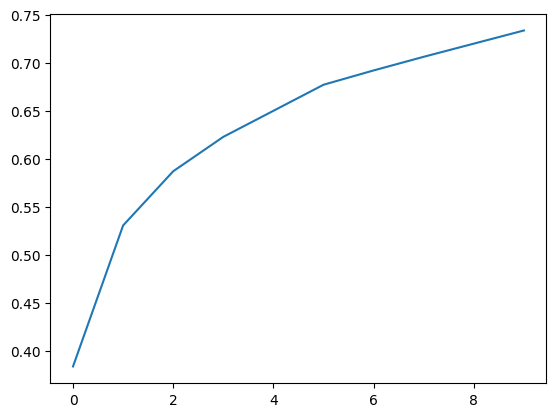

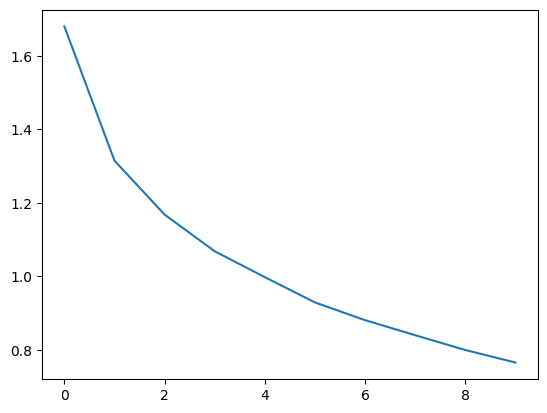

In [ ]:
plt.plot(output_fit.history['accuracy'])
plt.show()
plt.plot(output_fit.history['loss'])
plt.show()

In [ ]:
output_predict= model.predict(xtest, batch_size=128)

79/79 ━━━━━━━━━━━━━━━━━━━━ 4s 48ms/step


In [ ]:
print(output_predict)

[[1.3986925e-02 3.4907737e-03 9.2728985e-03 ... 2.3689510e-03
  9.7156018e-03 7.4000815e-03]
 [1.6648911e-01 2.8554854e-01 3.7159225e-05 ... 4.4319759e-06
  5.1200378e-01 3.5905976e-02]
 [3.0543508e-02 2.1196385e-01 2.6739453e-04 ... 1.0126552e-03
  3.9375305e-01 3.5997316e-01]
 ...
 [5.3122567e-05 4.9285700e-06 1.8002241e-03 ... 1.1077503e-02
  5.6338395e-06 9.7831551e-05]
 [1.2552725e-01 4.1726691e-01 3.4701726e-03 ... 6.4030425e-03
  2.1871937e-04 8.7327864e-03]
 [1.3320892e-05 1.7389219e-05 2.1082383e-04 ... 9.9164498e-01
  1.6898306e-07 1.4403992e-05]]


In [ ]:
predicted_classes = np.argmax(model.predict(xtest, batch_size=64), axis=-1)
print(ytrain[0:20])
print(predicted_classes[0:20])

157/157 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step
[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]
[3 8 8 0 6 6 1 6 3 1 0 9 5 7 9 8 5 7 8 6]


In [ ]:
output_evaluate = model.evaluate(xtest , ytest , batch_size=128)
print(output_evaluate)

79/79 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.6938 - loss: 0.8818
[0.8956466913223267, 0.6909000277519226]
